In [1]:
import numpy as np

### Load Features, Names, and Labels

In [2]:
train_features_path =  "../feature/BENGALI-RESNET-feature/train_features_triplet_loss.npy"
train_names_path = "../feature/BENGALI-RESNET-feature/train_names.npy"
train_labels_path = "../feature/BENGALI-RESNET-feature/train_labels.npy"

test_features_path = "../feature/BENGALI-RESNET-feature/test_features_triplet_loss.npy"
test_names_path = "../feature/BENGALI-RESNET-feature/test_names.npy"
test_labels_path = "../feature/BENGALI-RESNET-feature/test_labels.npy"

validation_features_path = "../feature/BENGALI-RESNET-feature/validation_features_triplet_loss.npy"
validation_names_path = "../feature/BENGALI-RESNET-feature/validation_names.npy"
validation_labels_path = "../feature/BENGALI-RESNET-feature/validation_labels.npy"

In [3]:
train_features = np.load(train_features_path)
train_names = np.load(train_names_path)
train_labels = np.load(train_labels_path)

test_features = np.load(test_features_path)
test_names = np.load(test_names_path)
test_labels = np.load(test_labels_path)

validation_features = np.load(validation_features_path)
validation_names = np.load(validation_names_path)
validation_labels = np.load(validation_labels_path)

In [4]:
print("train_features shape : ", train_features.shape)
print("test_features shape : ", test_features.shape)
print("validation_features shape : ", validation_features.shape)

train_features shape :  (3200, 2048)
test_features shape :  (1100, 2048)
validation_features shape :  (1100, 2048)


### Feature Gallery

In [5]:
# Feature Gallery dilakukan untuk setiap kelas / nama seperti "001", "002", "003", dst dengan cara mengambil data training positive dan mengambil mean / rata-rata dari data tersebut
def create_feature_gallery(train_features, train_names, train_labels):
    gallery_feature = []
    gallery_name = []

    unique_names = set(train_names.flatten())
    sorted_names = sorted(unique_names)

    for name in sorted_names:
        # print(name)
        # print(name)
        name_features = []

        for feature, feature_name, label in zip(train_features, train_names, train_labels):
            # print(feature, feature_name, label)
            if name in feature_name and label == 1:
                name_features.append(feature)

        if name_features:
            # print(name_features)
            average_feature = np.mean(name_features, axis=0)
            gallery_feature.append(average_feature)
            gallery_name.append(name)

    return gallery_feature, gallery_name

In [6]:
gallery_features, gallery_names = create_feature_gallery(train_features, train_names, train_labels)

In [7]:
gallery_feature_path = "../feature/BENGALI-RESNET-feature/gallery_features_triplet_loss.npy"
gallery_name_path = "../feature/BENGALI-RESNET-feature/gallery_names.npy"

In [8]:
np.save(gallery_feature_path, gallery_features)
np.save(gallery_name_path, gallery_names)

In [9]:
gallery_features = np.load(gallery_feature_path)
gallery_names = np.load(gallery_name_path)

In [10]:
gallery_features_array = np.array(gallery_features)
print("gallery features shape : ", gallery_features_array.shape)

gallery features shape :  (100, 2048)


### Euclidean Distance

In [11]:
def euclidean_distance(feature_vector1, feature_vector2):
    return np.sqrt(np.sum((feature_vector1 - feature_vector2)**2))

In [12]:
def find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names):
    euclidean_distances = []
    euclidean_names = []
    euclidean_actual_labels = []

    for gallery_feature, gallery_name in zip(gallery_features, gallery_names):
        curr_euclid_name = gallery_name
        curr_euclid_feature = []
        curr_euclid_label = []
        curr_euclid_dist = []
        for feature, name, label in zip(test_features, test_names, test_labels):
            if gallery_name in name:
                curr_euclid_feature.append(feature)
                curr_euclid_label.append(label)
        
        for feature in curr_euclid_feature:
            distance = euclidean_distance(feature, gallery_feature)
            curr_euclid_dist.append(distance)

        euclidean_distances.append(curr_euclid_dist)
        euclidean_names.append(curr_euclid_name)
        euclidean_actual_labels.append(curr_euclid_label)
        
    return euclidean_distances, euclidean_names, euclidean_actual_labels

In [13]:
test_euclidean_distances, test_euclidean_names, test_euclidean_actual_labels = find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names)
train_euclidean_distances, train_euclidean_names, train_euclidean_actual_labels = find_euclidean_distance(train_features, train_names, train_labels, gallery_features, gallery_names)
validation_euclidean_distances, validation_euclidean_names, validation_euclidean_actual_labels = find_euclidean_distance(validation_features, validation_names, validation_labels, gallery_features, gallery_names)

### Split Euclidean Distance to Positive and Negative for Future Use (If needed)

In [14]:
def split_euc_dist(euclidean_distances, euclidean_names, euclidean_actual_labels):
    positive_distance = []
    positive_name = []
    positive_label = []
    negative_distance = []
    negative_name = []
    negative_label = []

    for euclidean_distance, euclidean_name, euclidean_actual_label in zip(euclidean_distances, euclidean_names, euclidean_actual_labels):
        pos_dist = []
        neg_dist = []
        pos_lab = []
        neg_lab = []
        for distance, label in zip(euclidean_distance, euclidean_actual_label):
            if label == 0:
                neg_dist.append(distance)
                neg_lab.append(label)
            else:
                pos_dist.append(distance)
                pos_lab.append(label)

        positive_distance.append(pos_dist)
        positive_name.append(euclidean_name)
        positive_label.append(pos_lab)

        negative_distance.append(neg_dist)
        negative_name.append(euclidean_name)
        negative_label.append(neg_lab)
        # print(euclidean_distance, euclidean_name, euclidean_actual_label)

    return positive_distance, negative_label

In [15]:
train_positive_dist, train_negative_dist = split_euc_dist(train_euclidean_distances, train_names, train_euclidean_actual_labels)
test_positive_dist, test_negative_dist = split_euc_dist(test_euclidean_distances, test_names, test_euclidean_actual_labels)
validation_positive_dist, validation_negative_dist = split_euc_dist(validation_euclidean_distances, validation_names, validation_euclidean_actual_labels)

In [16]:
flat_train_positive_dist = [item for sublist in train_positive_dist for item in sublist]
flat_train_negative_dist = [item for sublist in train_negative_dist for item in sublist]
flat_test_positive_dist = [item for sublist in test_positive_dist for item in sublist]
flat_test_negative_dist = [item for sublist in test_negative_dist for item in sublist]
flat_validation_positive_dist = [item for sublist in validation_positive_dist for item in sublist]
flat_validation_negative_dist = [item for sublist in validation_negative_dist for item in sublist]

print(f'Train total : {len(flat_train_positive_dist) + len(flat_train_negative_dist)}')
print(f'  Train pos : {len(flat_train_positive_dist)}')
print(f'  Train neg : {len(flat_train_negative_dist)}')
print(f' Test total : {len(flat_test_positive_dist) + len(flat_test_negative_dist)}')
print(f'   Test pos : {len(flat_test_positive_dist)}')
print(f'   Test neg : {len(flat_test_negative_dist)}')
print(f'  Val total : {len(flat_validation_positive_dist) + len(flat_validation_negative_dist)}')
print(f'    Val pos : {len(flat_validation_positive_dist)}')
print(f'    Val neg : {len(flat_validation_negative_dist)}')

Train total : 3200
  Train pos : 1400
  Train neg : 1800
 Test total : 1100
   Test pos : 500
   Test neg : 600
  Val total : 1100
    Val pos : 500
    Val neg : 600


### Normalize Euclidean Distance

In [17]:
# Flatten the lists of distances
flat_test_distances = [item for sublist in test_euclidean_distances for item in sublist]
flat_train_distances = [item for sublist in train_euclidean_distances for item in sublist]
flat_validation_distances = [item for sublist in validation_euclidean_distances for item in sublist]

In [18]:
print(flat_train_distances)

[33.711697, 31.792912, 32.652958, 29.274946, 38.692135, 33.64999, 35.99192, 46.95249, 37.78881, 34.06661, 32.551994, 33.416973, 31.425259, 36.01371, 36.50269, 41.53521, 44.908337, 50.95387, 42.681976, 37.75831, 32.57898, 37.911163, 41.879086, 33.056576, 33.263226, 41.835396, 39.753838, 40.92001, 40.88472, 42.28233, 30.47203, 38.156124, 35.81345, 36.90149, 32.869766, 31.063976, 36.72838, 37.69706, 38.609596, 38.071568, 33.274334, 40.237255, 33.914318, 36.486458, 38.293182, 32.62153, 47.88919, 52.474346, 46.56698, 41.997772, 44.350304, 39.080032, 48.01144, 43.263237, 42.576847, 47.76494, 41.595455, 48.91426, 41.97032, 55.016407, 40.246613, 48.76948, 45.327854, 64.52896, 42.505344, 32.717945, 38.883396, 29.825579, 40.94847, 31.527935, 32.52591, 40.94847, 35.553204, 29.825579, 38.883396, 40.94847, 35.553204, 29.825579, 38.612015, 42.626442, 43.2645, 39.000515, 42.242897, 44.291695, 40.591194, 39.487343, 42.90582, 53.071907, 51.42816, 44.65269, 48.072773, 38.869926, 39.52725, 36.897064, 38.

In [19]:
for name, distance, label in zip(test_names, flat_test_distances, test_labels):
    print(name, distance, label)

001 39.0703 1
001 29.975203 1
001 37.58924 1
001 31.892223 1
001 34.431458 1
001 42.649864 0
001 33.002808 0
001 38.90007 0
001 38.120514 0
001 40.745808 0
001 37.48349 0
002 33.813057 1
002 47.322277 1
002 41.35937 1
002 40.05705 1
002 38.42466 1
002 40.20743 0
002 47.05352 0
002 44.235645 0
002 47.632545 0
002 50.805786 0
002 48.31107 0
003 40.253994 1
003 32.34589 1
003 35.553204 1
003 32.707073 1
003 38.883396 1
003 39.72192 0
003 41.094433 0
003 45.415325 0
003 37.55677 0
003 38.11507 0
003 52.49422 0
004 46.951862 1
004 37.892925 1
004 37.57311 1
004 36.561684 1
004 56.67315 1
004 45.00751 0
004 44.25637 0
004 43.610897 0
004 36.911285 0
004 37.82786 0
004 32.960415 0
005 30.81859 1
005 31.086891 1
005 44.504223 1
005 35.815617 1
005 42.048367 1
005 35.933727 0
005 56.531948 0
005 36.649727 0
005 40.772804 0
005 38.770058 0
005 43.150635 0
006 37.540905 1
006 34.59878 1
006 31.07838 1
006 35.871674 1
006 29.568783 1
006 46.75577 0
006 40.191742 0
006 36.860798 0
006 43.077385 0
0

In [20]:
def get_min_max(euclidean_distances):
    min_distance = min(euclidean_distances)
    max_distance = max(euclidean_distances)

    return min_distance, max_distance

In [21]:
min_val, max_val = get_min_max(flat_train_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_validation_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_test_distances)
print(f'min: {min_val}, max: {max_val}')

min: 20.58921241760254, max: 88.09285736083984
min: 23.400720596313477, max: 73.79773712158203
min: 23.326528549194336, max: 78.71089935302734


In [22]:
def normalize_distance(euclidean_distances, min_val, max_val):
    all_distance = []

    for distance in euclidean_distances:
        normalized_distance = (distance - min_val) / (max_val - min_val)

        # in case test and train distances are beyond max of train
        if normalized_distance > 1:
            normalized_distance = 1
        elif normalized_distance < 0:
            normalized_distance = 0
        
        all_distance.append(normalized_distance)

    return all_distance

def reverse_normalized_distance(euclidean_distances, min_val, max_val):
    reverse_distance = []
    normalized_distances = normalize_distance(euclidean_distances, min_val, max_val)
    for distance in normalized_distances:
        distance = -distance
        reverse_distance.append(distance)

    return reverse_distance

In [23]:
# normalized_positive_distances = reverse_normalized_distance(positive_distance)
# normalized_negative_distances = reverse_normalized_distance(negative_distance)

In [24]:
normalized_test_euclidean_distance = reverse_normalized_distance(flat_test_distances, min_val, max_val)
normalized_train_euclidean_distance = reverse_normalized_distance(flat_train_distances, min_val, max_val)
normalized_validation_euclidean_distance = reverse_normalized_distance(flat_validation_distances, min_val, max_val)

In [25]:
print(normalized_test_euclidean_distance)

[-0.28426382, -0.120046034, -0.25752234, -0.15465906, -0.20050655, -0.3488951, -0.17471138, -0.2811902, -0.26711482, -0.31451616, -0.25561294, -0.18934093, -0.4332585, -0.32559446, -0.30208018, -0.27260637, -0.30479544, -0.4284059, -0.3775274, -0.4388606, -0.49615547, -0.45111176, -0.30563617, -0.1628503, -0.22076039, -0.1693717, -0.28088912, -0.2960292, -0.32081082, -0.39882725, -0.25693607, -0.26701653, -0.52664125, -0.42657042, -0.26300555, -0.25723106, -0.23896915, -0.6020944, -0.39146394, -0.3779016, -0.36624718, -0.24528143, -0.2618308, -0.17394595, -0.13527393, -0.14011829, -0.38237673, -0.22549842, -0.3380347, -0.22763099, -0.599545, -0.24055882, -0.3150036, -0.27884275, -0.35793683, -0.2566496, -0.2035277, -0.13996463, -0.22651057, -0.11270787, -0.42302987, -0.30451214, -0.24436983, -0.35661426, -0.1456702, -0.37066665, -0.46100256, -0.30687207, -0.16344994, -0.40986374, -0.30490208, -0.21017843, -0.39318177, -0.31567466, -0.39318177, -0.12146862, -0.26196578, -0.5500145, -0.1

In [26]:
for name, distance, label in zip(test_names, normalized_test_euclidean_distance, test_labels):
    print(name, distance, label)

001 -0.28426382 1
001 -0.120046034 1
001 -0.25752234 1
001 -0.15465906 1
001 -0.20050655 1
001 -0.3488951 0
001 -0.17471138 0
001 -0.2811902 0
001 -0.26711482 0
001 -0.31451616 0
001 -0.25561294 0
002 -0.18934093 1
002 -0.4332585 1
002 -0.32559446 1
002 -0.30208018 1
002 -0.27260637 1
002 -0.30479544 0
002 -0.4284059 0
002 -0.3775274 0
002 -0.4388606 0
002 -0.49615547 0
002 -0.45111176 0
003 -0.30563617 1
003 -0.1628503 1
003 -0.22076039 1
003 -0.1693717 1
003 -0.28088912 1
003 -0.2960292 0
003 -0.32081082 0
003 -0.39882725 0
003 -0.25693607 0
003 -0.26701653 0
003 -0.52664125 0
004 -0.42657042 1
004 -0.26300555 1
004 -0.25723106 1
004 -0.23896915 1
004 -0.6020944 1
004 -0.39146394 0
004 -0.3779016 0
004 -0.36624718 0
004 -0.24528143 0
004 -0.2618308 0
004 -0.17394595 0
005 -0.13527393 1
005 -0.14011829 1
005 -0.38237673 1
005 -0.22549842 1
005 -0.3380347 1
005 -0.22763099 0
005 -0.599545 0
005 -0.24055882 0
005 -0.3150036 0
005 -0.27884275 0
005 -0.35793683 0
006 -0.2566496 1
006 -0.2

# 3. ROC Curve

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

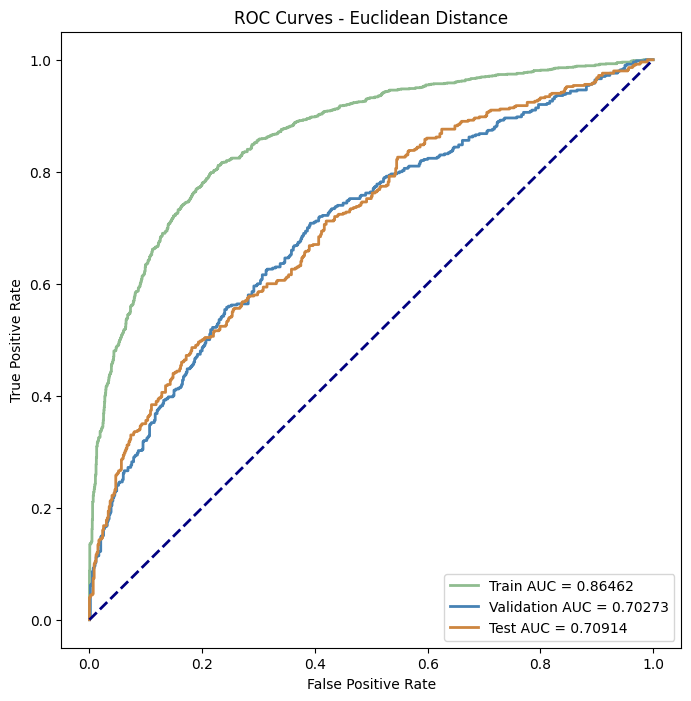

In [28]:
# Flatten the lists of labels
flat_test_labels = [item for sublist in test_euclidean_actual_labels for item in sublist]
flat_train_labels = [item for sublist in train_euclidean_actual_labels for item in sublist]
flat_validation_labels = [item for sublist in validation_euclidean_actual_labels for item in sublist]

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(flat_test_labels, normalized_test_euclidean_distance, drop_intermediate=False)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, thresholds_train = roc_curve(flat_train_labels, normalized_train_euclidean_distance, drop_intermediate=False)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_validation, tpr_validation, thresholds_validation = roc_curve(flat_validation_labels, normalized_validation_euclidean_distance, drop_intermediate=False)
roc_auc_validation = auc(fpr_validation, tpr_validation)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(fpr_train, tpr_train, color='darkseagreen', lw=2, label=f'Train AUC = {roc_auc_train:.5f}')
plt.plot(fpr_validation, tpr_validation, color='steelblue', lw=2, label=f'Validation AUC = {roc_auc_validation:.5f}')
plt.plot(fpr_test, tpr_test, color='peru', lw=2, label=f'Test AUC = {roc_auc_test:.5f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Euclidean Distance')
plt.legend(loc='lower right')
plt.show()

In [29]:
print(tpr_test)

[0.    0.002 0.004 ... 1.    1.    1.   ]


In [30]:
print(fpr_test)

[0.         0.         0.         ... 0.99666667 0.99833333 1.        ]


In [31]:
def find_tpr_at_fpr(fpr, tpr, target_fpr):
    return np.interp(target_fpr, fpr, tpr)

In [32]:
target_fprs = [0.1, 0.01, 0.001]
tpr_at_target_fpr_train = [find_tpr_at_fpr(fpr_train, tpr_train, fpr) for fpr in target_fprs]
tpr_at_target_fpr_test = [find_tpr_at_fpr(fpr_test, tpr_test, fpr) for fpr in target_fprs]
tpr_at_target_fpr_val = [find_tpr_at_fpr(fpr_validation, tpr_validation, fpr) for fpr in target_fprs]

In [33]:
print("Train")
for tpr, fpr in zip(tpr_at_target_fpr_train, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_train}')

print("Validation")
for tpr, fpr in zip(tpr_at_target_fpr_val, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_validation}')

print("Test")
for tpr, fpr in zip(tpr_at_target_fpr_test, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_test}')


Train
TPR at FPR 0.100: 0.635
TPR at FPR 0.010: 0.244
TPR at FPR 0.001: 0.134
             AUC: 0.8646230158730159
Validation
TPR at FPR 0.100: 0.320
TPR at FPR 0.010: 0.102
TPR at FPR 0.001: 0.004
             AUC: 0.7027333333333333
Test
TPR at FPR 0.100: 0.356
TPR at FPR 0.010: 0.104
TPR at FPR 0.001: 0.040
             AUC: 0.70914
